In [30]:
df = df.drop(columns=[

    'ls',
    'st',
    'rs',
    'lw',
    'lf',
    'cf',
    'rf',
    'rw',
    'lam',
    'cam',
    'ram',
    'lm',
    'lcm',
    'cm',
    'rcm',
    'rm',
    'lwb',
    'ldm',
    'cdm',
    'rdm',
    'rwb',
    'lb',
    'lcb',
    'cb',
    'rcb',
    'rb'
])

In [31]:
import pandas as pd
df = pd.read_csv('data/players_20.csv')
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_

In [6]:
attackers = df[df['player_positions'].str.contains('ST|CF|LW|RW|LF|RF')]
attackers


,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,90,94,27,26,29,9,9,15,15,11
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,88,91,34,27,22,11,12,6,8,8
9,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,240000,...,77,91,38,43,41,14,14,9,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18249,Shan Huanhuan,20,185,75,China PR,Dalian YiFang FC,48,65,70000,2000,...,45,45,30,27,26,14,12,11,5,9
18250,R. Roache,19,178,74,Republic of Ireland,Blackpool,48,65,60000,1000,...,55,49,18,16,11,6,9,11,7,12
18254,E. Jääskeläinen,18,183,66,Finland,Blackpool,48,65,60000,1000,...,55,49,18,16,17,7,7,13,13,9
18257,Song Min Kyu,19,179,72,Korea Republic,Pohang Steelers,48,64,60000,1000,...,51,43,15,26,27,11,12,11,9,8


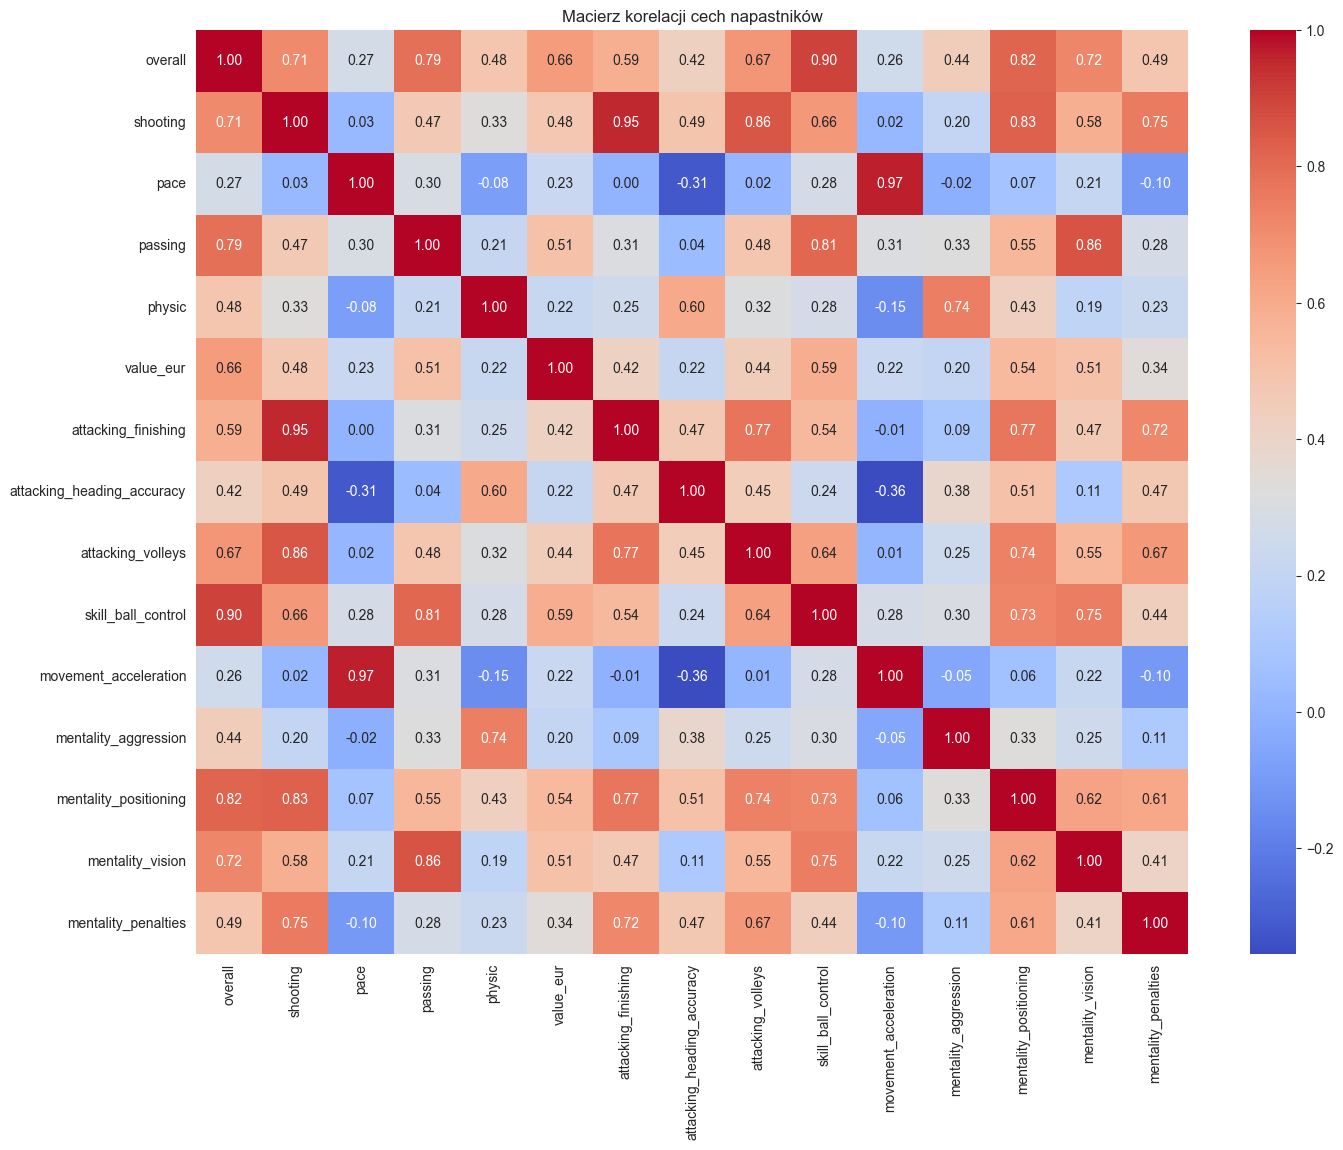

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

key_features = [ 'overall', 'shooting', 'pace', 'passing',
                'physic', 'value_eur', 'attacking_finishing',
                'attacking_heading_accuracy',  'attacking_volleys',
                'skill_ball_control', 'movement_acceleration', 'mentality_aggression',
                'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                ]
attackers_key_data = attackers[key_features].dropna()

correlation_matrix = attackers_key_data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Macierz korelacji cech napastników")
plt.show()



In [8]:
attackers['player_positions'].value_counts()
attackers['nu']

KeyError: 'nu'

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

regression_data = df[['skill_ball_control', 'dribbling', 'overall']].dropna()
X = regression_data[['skill_ball_control', 'dribbling']]
y = regression_data['overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

# coefficients

model.coef_




MSE: 19.72597470954633
R2: 0.5739045885190812


array([ 0.80381717, -0.31931957])

In [11]:
# attackers = attackers.drop(columns=['dribbling'])
attackers = attackers.drop(columns=['movement_sprint_speed'])
attackers = attackers.drop(columns=['power_long_shots'])

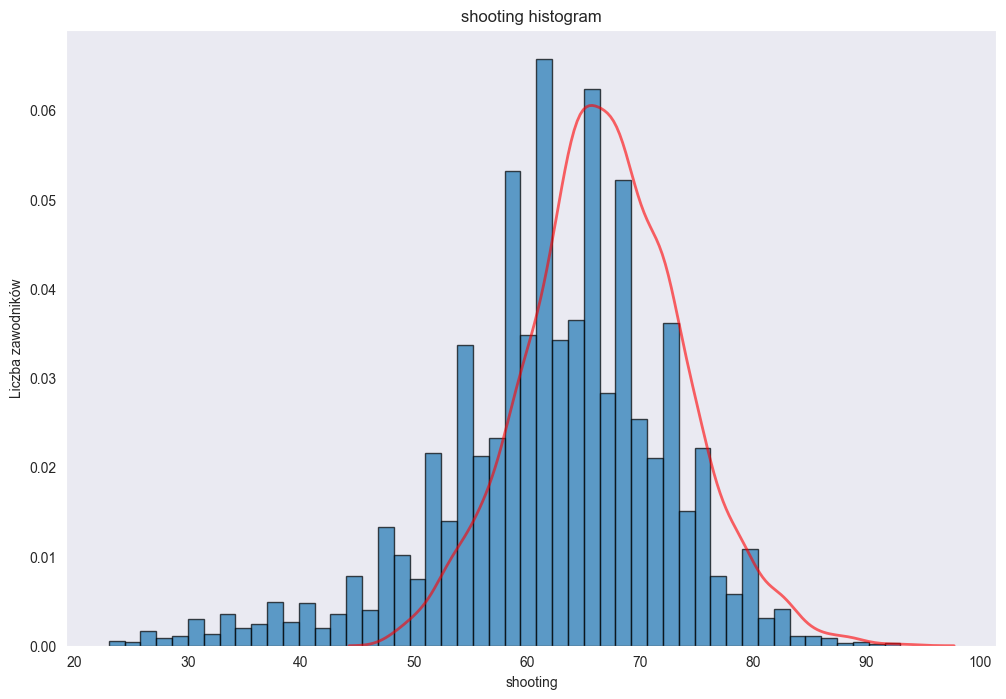

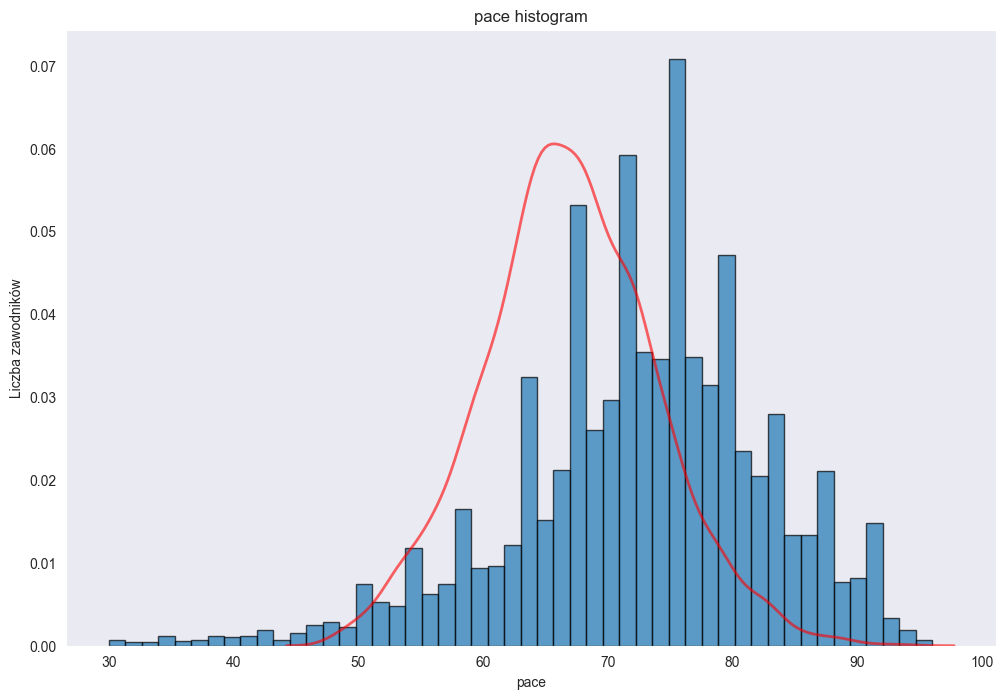

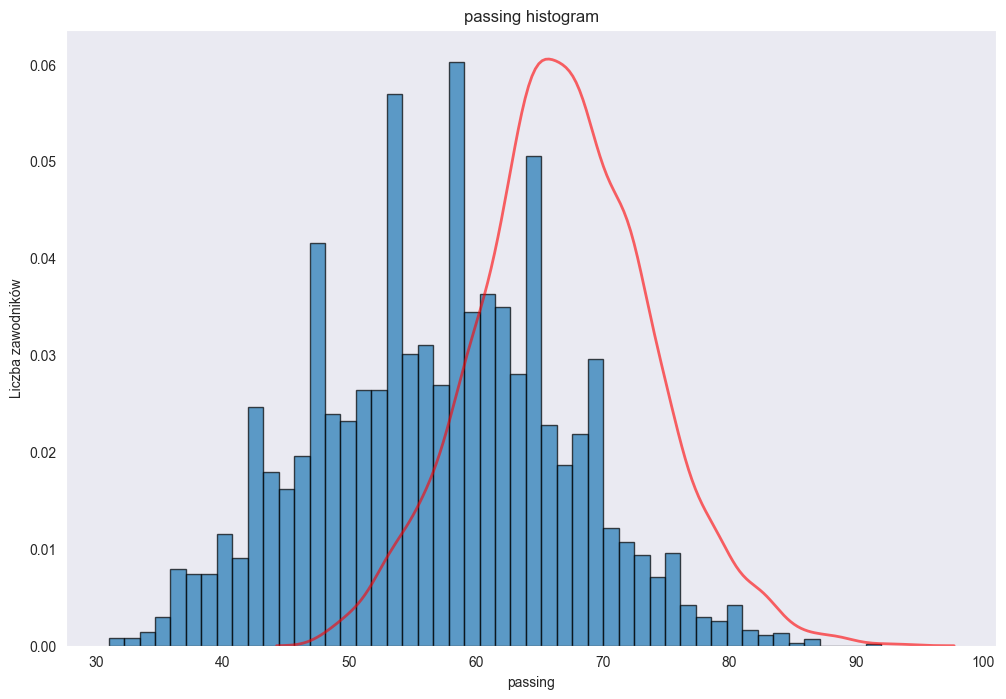

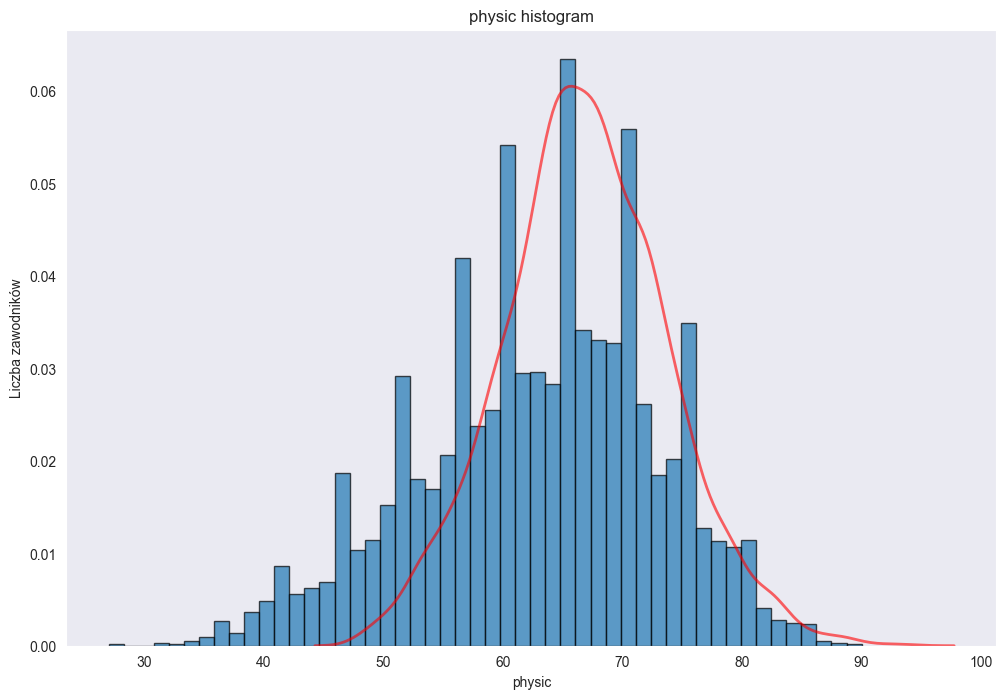

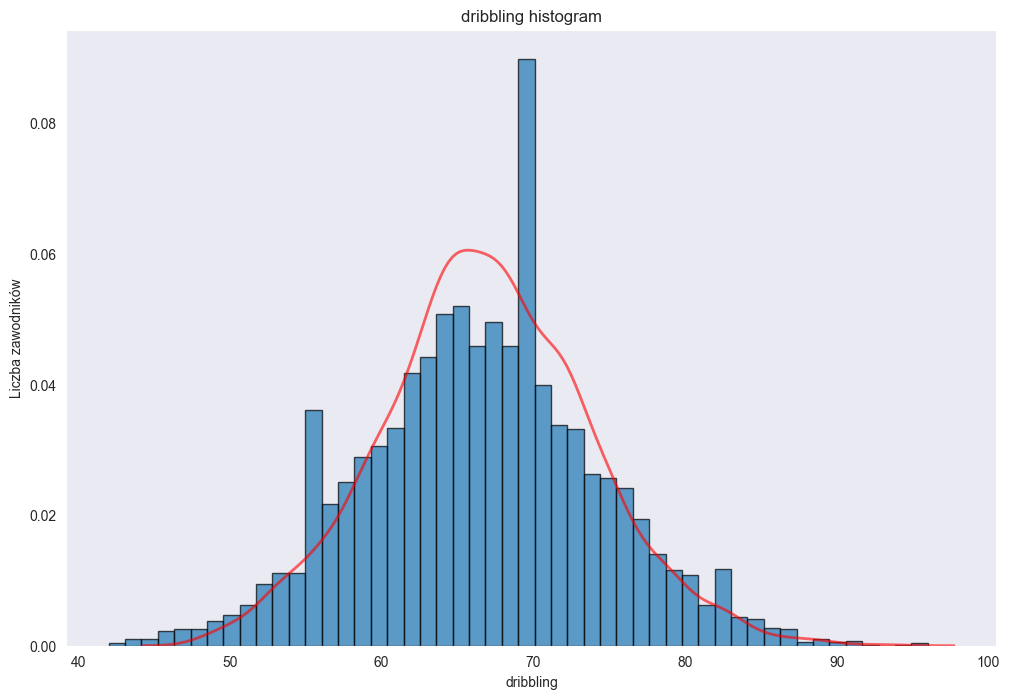

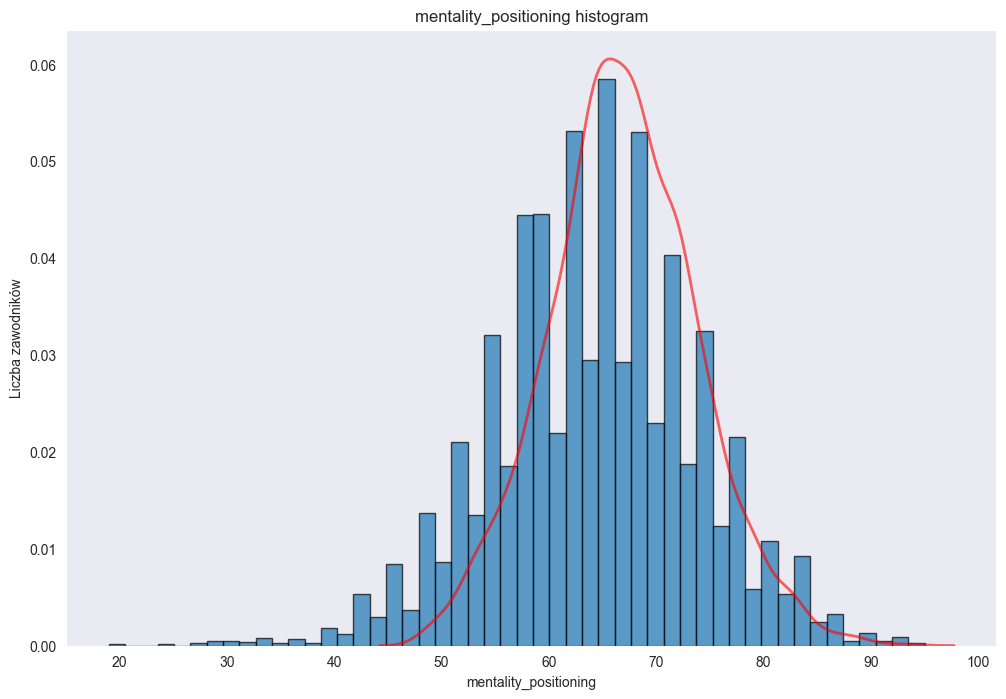

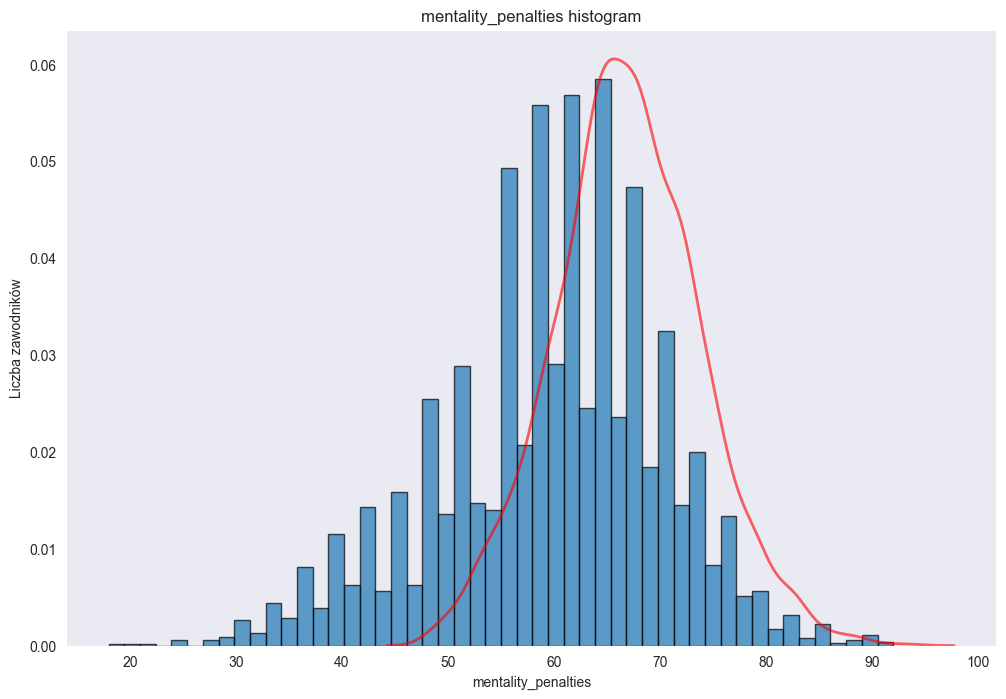

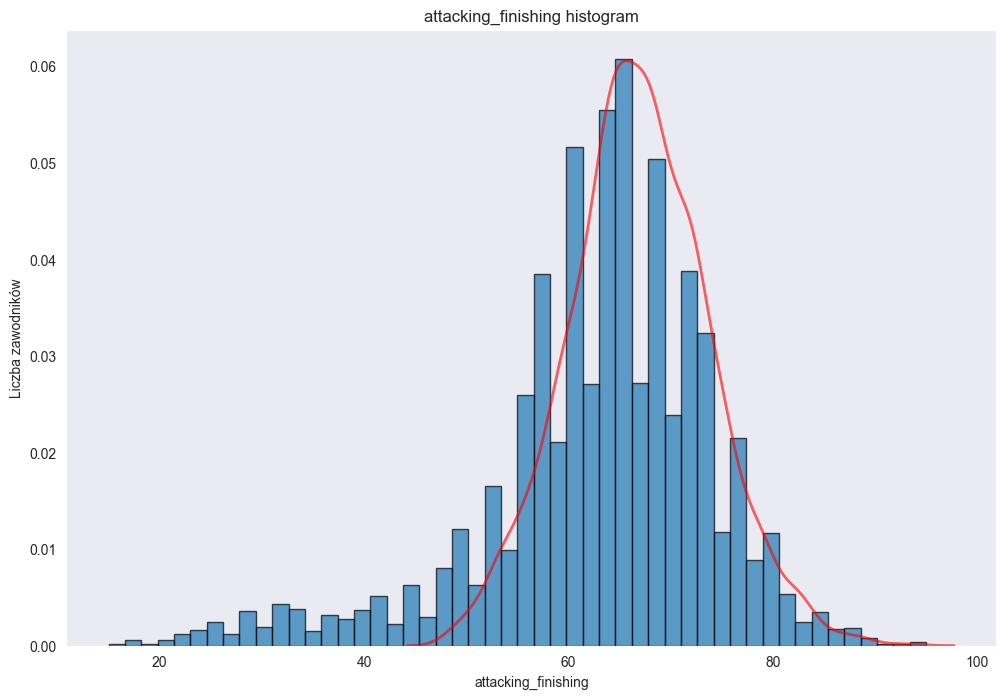

In [12]:
features = ['shooting', 'pace', 'passing', 'physic', 'dribbling',
 'mentality_positioning','mentality_penalties', 'attacking_finishing']

from matplotlib import pyplot as plt
import seaborn as sns

for f in features:
    plt.figure(figsize=(12,8))
    attackers[f].dropna().hist(bins=50 ,edgecolor='black', alpha=0.7, density=True)
    sns.kdeplot(attackers['overall'].dropna(), color='red', lw=2, label='Overall (cień)', alpha=0.6)
    plt.title(f'{f} histogram')
    plt.xlabel(f'{f}')
    plt.ylabel('Liczba zawodników')
    plt.grid(False)
    plt.show()

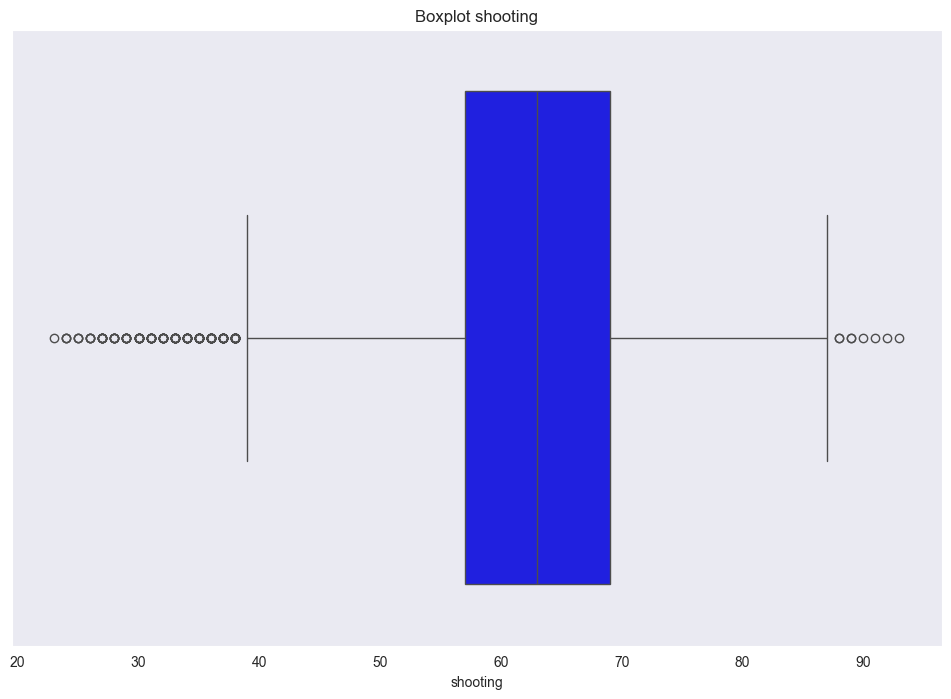

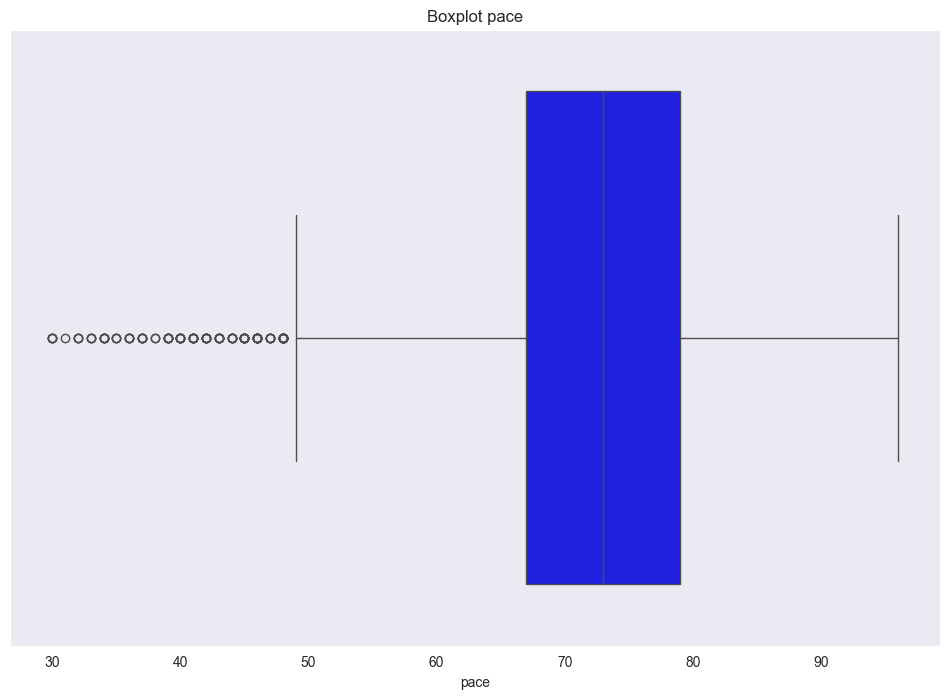

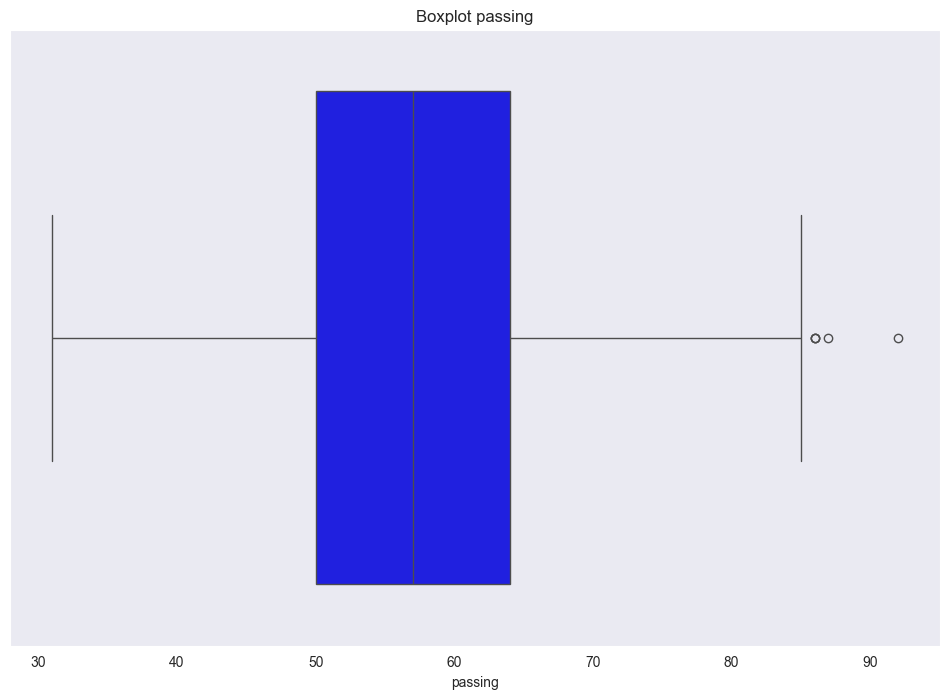

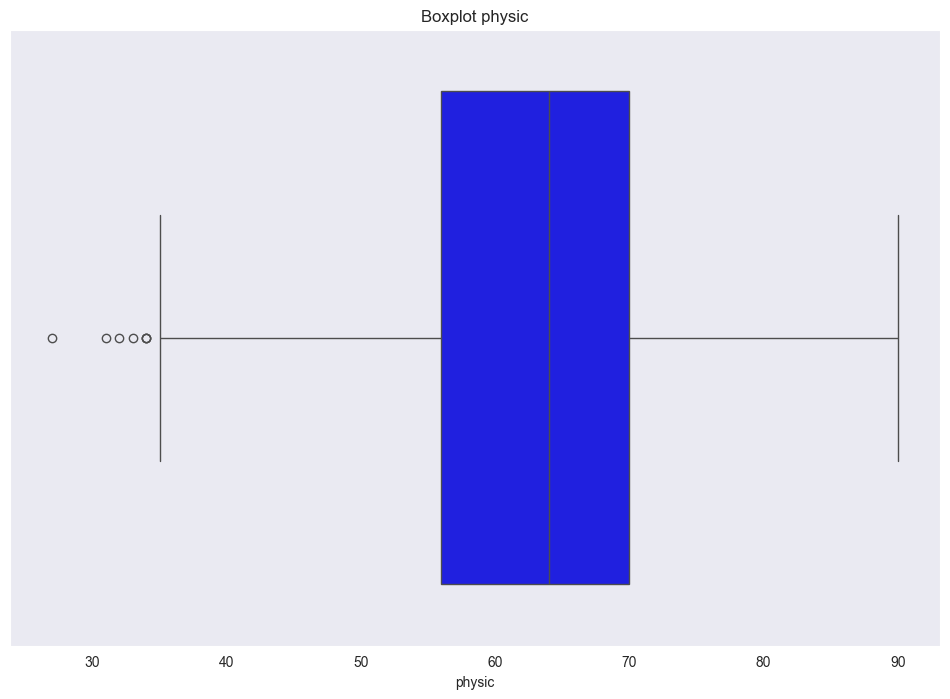

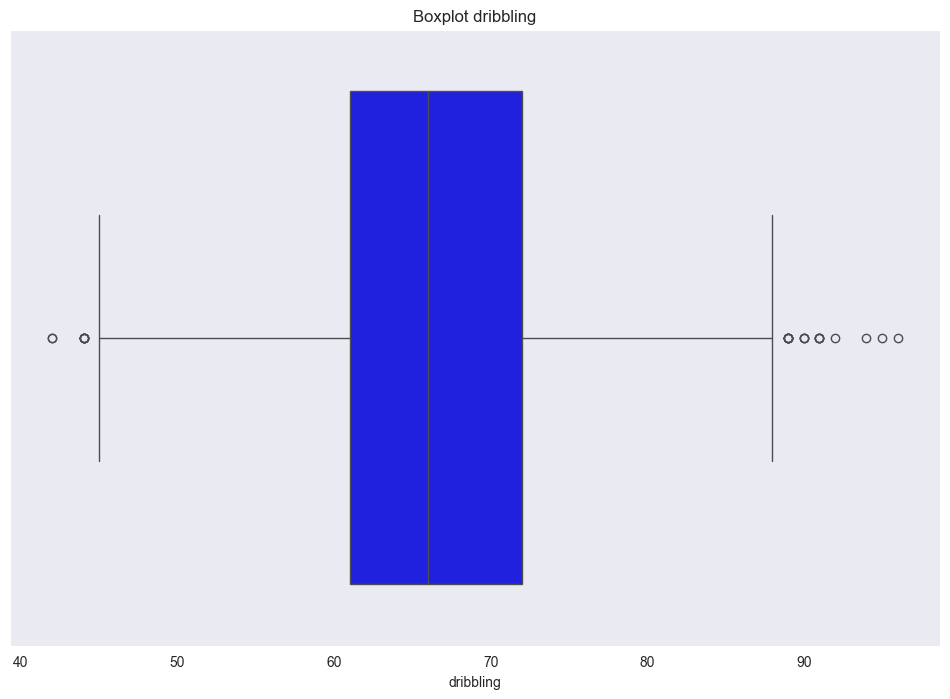

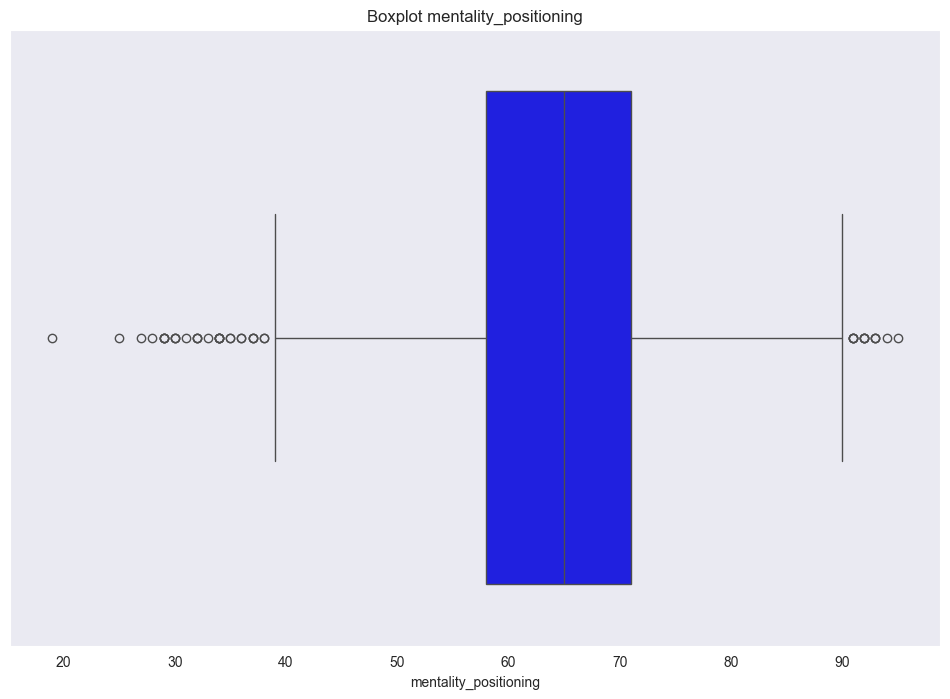

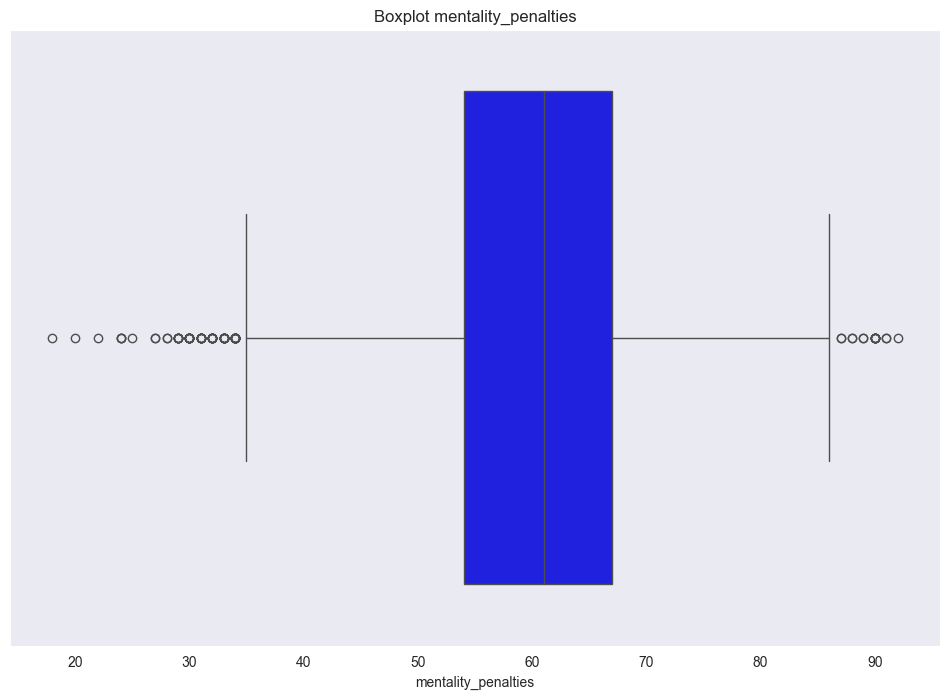

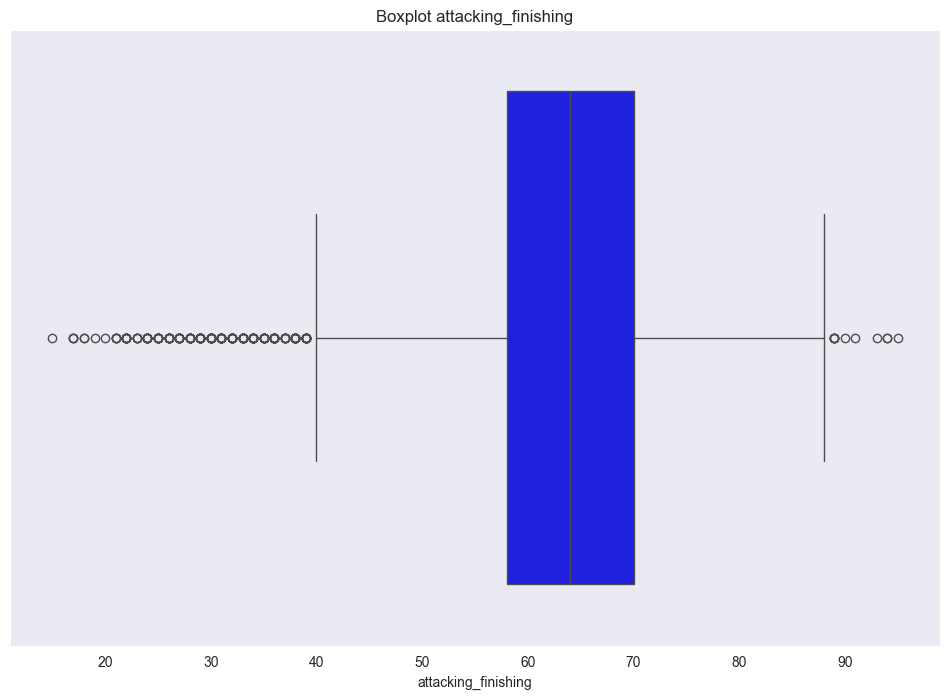

In [13]:
for f in features:
    plt.figure(figsize=(12,8))
    sns.boxplot(data=attackers, x=f, color='blue')
    plt.title(f'Boxplot {f}')
    plt.xlabel(f'{f}')
    plt.grid(False)
    plt.show()

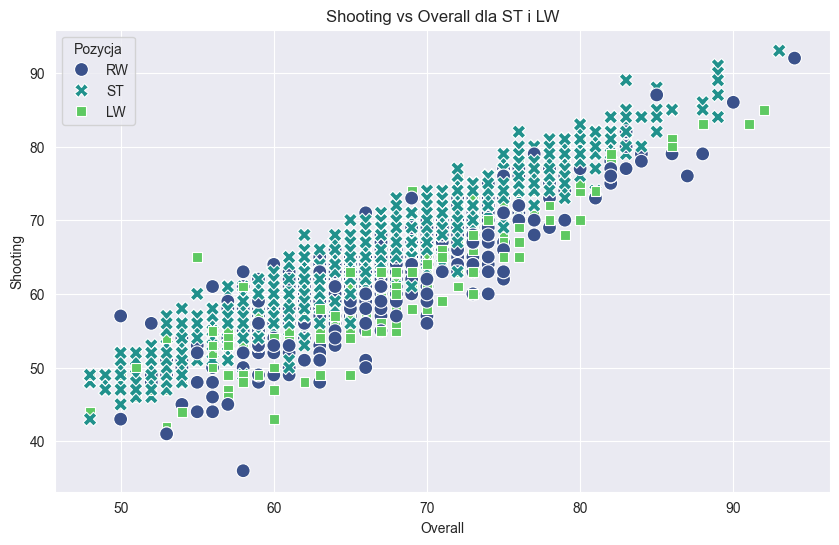

In [14]:
attackers['primary_position'] = attackers['player_positions'].str.split(',').str[0]

positions_to_compare = ['ST', 'LW', 'RW']
comparison_data = attackers[attackers['primary_position'].isin(positions_to_compare)]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=comparison_data,
    x='overall',
    y='shooting',
    hue='primary_position',
    style='primary_position',
    palette='viridis',
    s=100
)
plt.title("Shooting vs Overall dla ST i LW")
plt.xlabel("Overall")
plt.ylabel("Shooting")
plt.legend(title="Pozycja")
plt.grid(True)
plt.show()

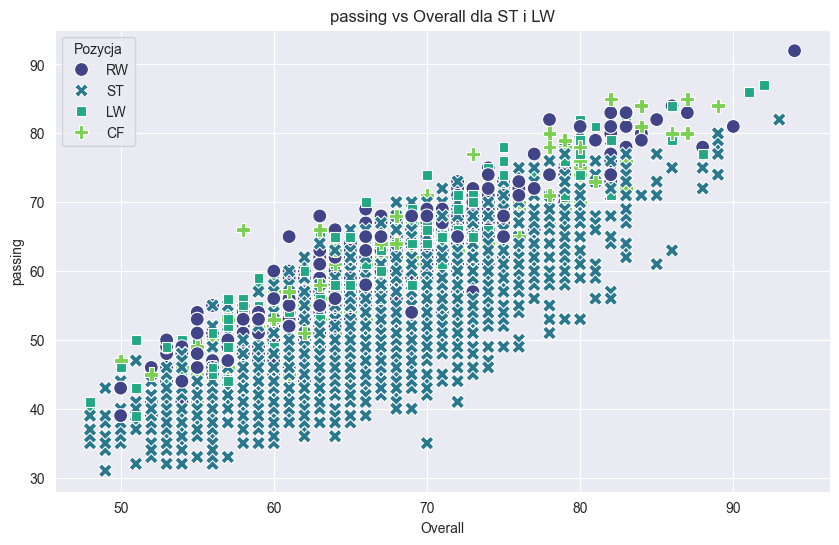

In [18]:
    plt.show()
attackers['primary_position'] = attackers['player_positions'].str.split(',').str[0]

positions_to_compare = ['ST', 'LW', 'RW', 'CF']
comparison_data = attackers[attackers['primary_position'].isin(positions_to_compare)]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=comparison_data,
    x='overall',
    y='passing',
    hue='primary_position',
    style='primary_position',
    palette='viridis',
    s=100
)
plt.title("passing vs Overall dla ST i LW")
plt.xlabel("Overall")
plt.ylabel("passing")
plt.legend(title="Pozycja")
plt.grid(True)
plt.show()

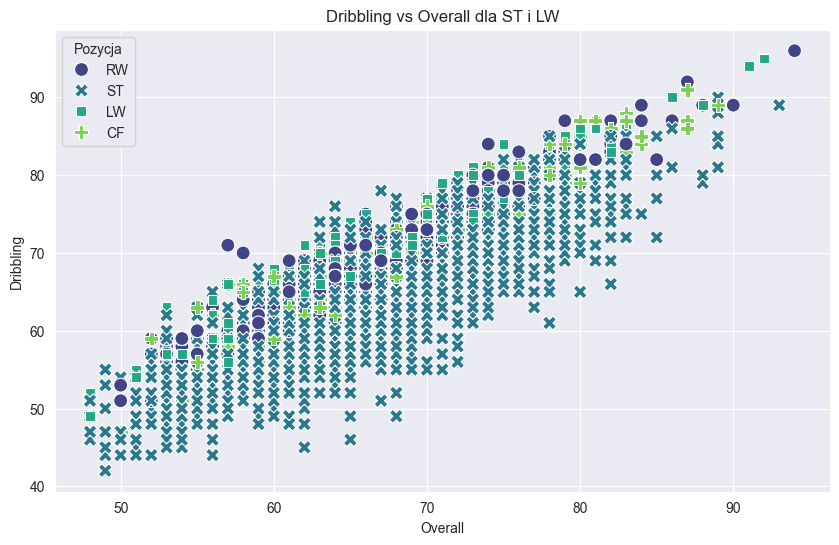

In [17]:
attackers['primary_position'] = attackers['player_positions'].str.split(',').str[0]

positions_to_compare = ['ST', 'LW', 'RW']
comparison_data = attackers[attackers['primary_position'].isin(positions_to_compare)]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=comparison_data,
    x='overall',
    y='dribbling',
    hue='primary_position',
    style='primary_position',
    palette='viridis',
    s=100
)
plt.title("Dribbling vs Overall dla ST i LW")
plt.xlabel("Overall")
plt.ylabel("Dribbling")
plt.legend(title="Pozycja")
plt.grid(True)
plt.show()

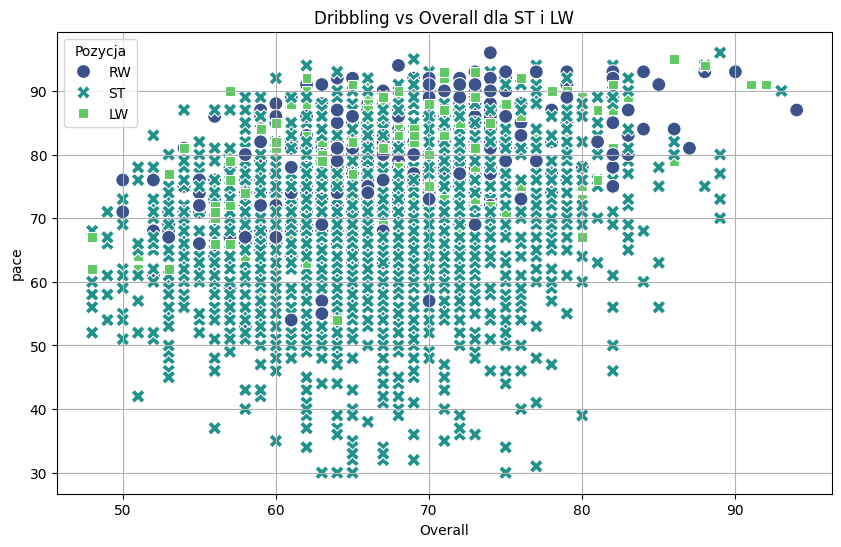

In [74]:
attackers['primary_position'] = attackers['player_positions'].str.split(',').str[0]

positions_to_compare = ['ST', 'LW', 'RW']
comparison_data = attackers[attackers['primary_position'].isin(positions_to_compare)]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=comparison_data,
    x='overall',
    y='pace',
    hue='primary_position',
    style='primary_position',
    palette='viridis',
    s=100
)
plt.title("Dribbling vs Overall dla ST i LW")
plt.xlabel("Overall")
plt.ylabel("pace")
plt.legend(title="Pozycja")
plt.grid(True)
plt.show()

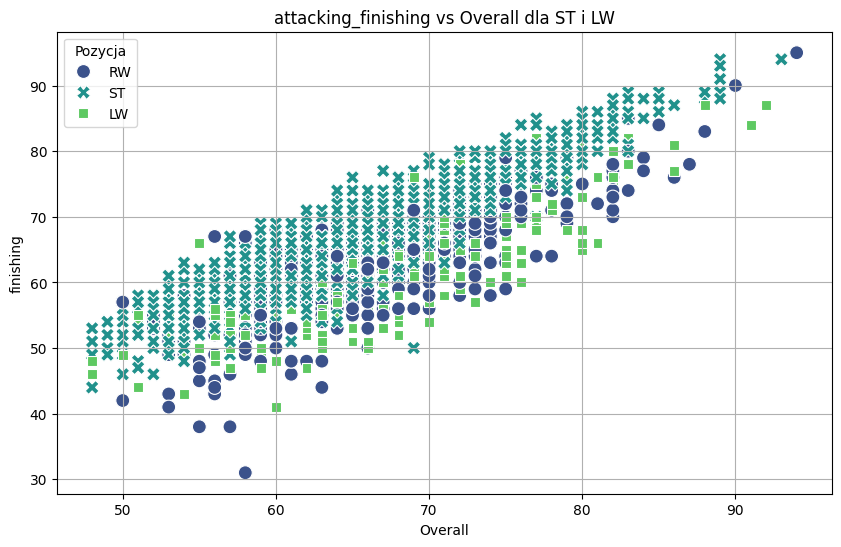

In [98]:
attackers['primary_position'] = attackers['player_positions'].str.split(',').str[0]

positions_to_compare = ['ST', 'LW', 'RW']
comparison_data = attackers[attackers['primary_position'].isin(positions_to_compare)]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=comparison_data,
    x='overall',
    y='attacking_finishing',
    hue='primary_position',
    style='primary_position',
    palette='viridis',
    s=100
)
plt.title("attacking_finishing vs Overall dla ST i LW")
plt.xlabel("Overall")
plt.ylabel("finishing")
plt.legend(title="Pozycja")
plt.grid(True)
plt.show()

In [13]:
from sklearn.ensemble import RandomForestRegressor
# 'skill_ball_control',
features = ['shooting', 'pace', 'passing', 'physic', 'dribbling',
 'mentality_positioning','mentality_penalties', 'attacking_finishing']

model_data = attackers[features + ['overall']].dropna()
X = model_data[features]
y = model_data['overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_predict_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_predict_linear)
r2_linear = r2_score(y_test, y_predict_linear)


rf_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_forest_model.fit(X_train, y_train)
y_predict_forest = rf_forest_model.predict(X_test)

mse_forest = mean_squared_error(y_test, y_predict_forest)
r2_forest = r2_score(y_test, y_predict_forest)

features_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_forest_model.feature_importances_
}).sort_values('importance', ascending=False)

y_train_predict_linear = linear_model.predict(X_train)
r2_train_linear = r2_score(y_train, y_train_predict_linear)

# Dla Random Forest
y_train_predict_forest = rf_forest_model.predict(X_train)
r2_train_forest = r2_score(y_train, y_train_predict_forest)

{
    'r2_train_linear': r2_train_linear,
    'r2_test_linear': r2_linear,
    'r2_train_forest': r2_train_forest,
    'r2_test_forest': r2_forest,
    'mse_linear': mse_linear,
    'r2_linear': r2_linear,
    'mse_forest': mse_forest,
    'r2_forest': r2_forest,
    'features_importance': features_importance
}




{'r2_train_linear': 0.9082921563144073,
 'r2_test_linear': 0.9123459755007884,
 'r2_train_forest': 0.9937331747970414,
 'r2_test_forest': 0.9573657695904012,
 'mse_linear': 4.195320694696499,
 'r2_linear': 0.9123459755007884,
 'mse_forest': 2.040571099407505,
 'r2_forest': 0.9573657695904012,
 'features_importance':                  feature  importance
 5  mentality_positioning    0.457560
 0               shooting    0.199171
 4              dribbling    0.170114
 2                passing    0.100993
 3                 physic    0.044019
 1                   pace    0.011461
 7    attacking_finishing    0.010768
 6    mentality_penalties    0.005914}

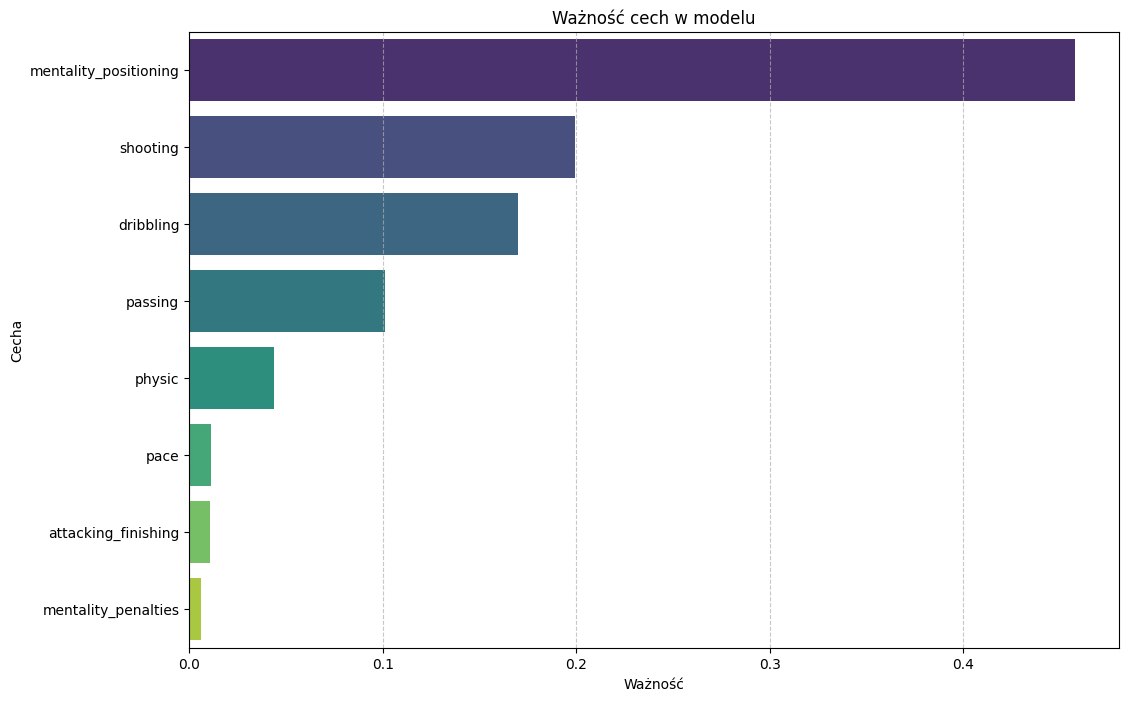

In [95]:
plt.figure(figsize=(12, 8))
sns.barplot(data=features_importance, x='importance', y='feature', palette='viridis', hue='feature')
plt.title("Ważność cech w modelu")
plt.xlabel("Ważność")
plt.ylabel("Cecha")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

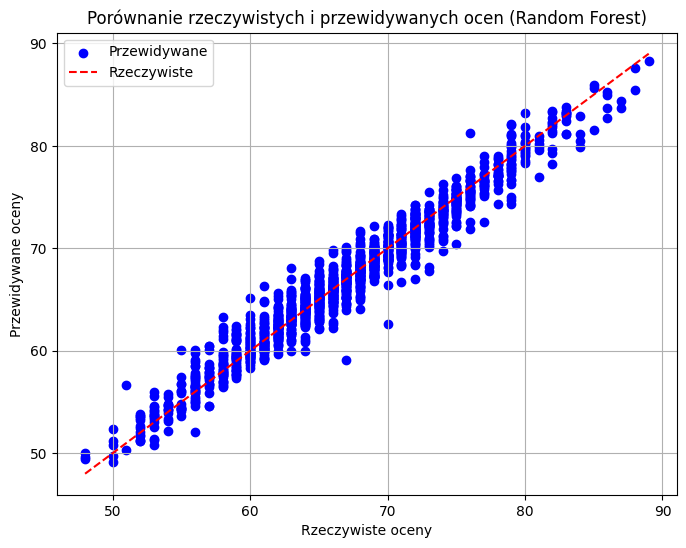

In [96]:
# Porównanie rzeczywistych i przewidywanych wartości (dla Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_forest, color='blue', label='Przewidywane')
plt.plot([
    y_test.min(), y_test.max()
],
[
    y_test.min(), y_test.max()
],
color='red', linestyle='--', label='Rzeczywiste'
)
plt.title("Porównanie rzeczywistych i przewidywanych ocen (Random Forest)")
plt.xlabel("Rzeczywiste oceny")
plt.ylabel("Przewidywane oceny")
plt.legend()
plt.grid(True)
plt.show()

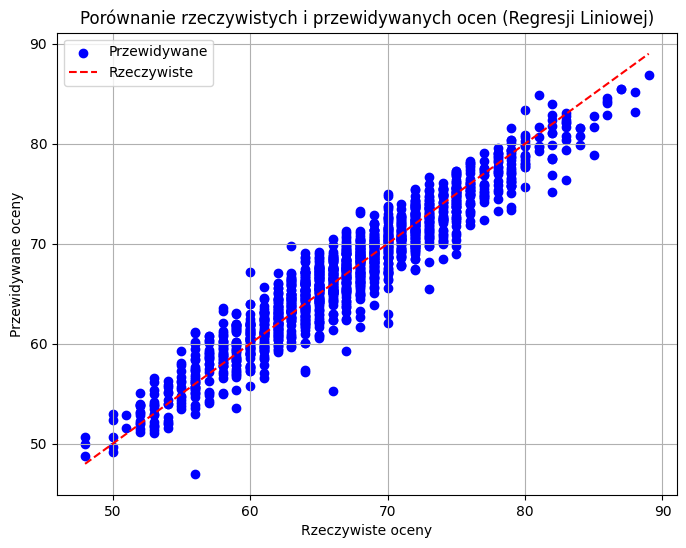

In [99]:
# Porównanie rzeczywistych i przewidywanych wartości (dla Regresji Liniowej)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_linear, color='blue', label='Przewidywane')
plt.plot([
    y_test.min(), y_test.max()
],
[
    y_test.min(), y_test.max()
],
color='red', linestyle='--', label='Rzeczywiste'
)
plt.title("Porównanie rzeczywistych i przewidywanych ocen (Regresji Liniowej)")
plt.xlabel("Rzeczywiste oceny")
plt.ylabel("Przewidywane oceny")
plt.legend()
plt.grid(True)
plt.show()


Raport analizy danych zawodników FIFA

1. Cel eksperymentu

Celem eksperymentu było zidentyfikowanie cech zawodników FIFA, które mają największy wpływ na ich ocenę ogólną (overall). Analiza skupiła się na napastnikach (pozycje: ST, LW, RW, CF), przy wykorzystaniu wybranych parametrów technicznych, fizycznych i mentalnych.

2. Dane i ich wstępna analiza

Dane pochodziły z bazy FIFA, a analiza dotyczyła 17 kluczowych cech, w tym:

Techniczne: shooting, skill_ball_control, passing

Fizyczne: pace, physic

Mentalne: mentality_positioning, mentality_penalties

Wstępne kroki:

Usunięto kolumny nieistotne (np. player_url, dob).

Napastnicy zostali odseparowani na podstawie ich pozycji w kolumnie player_positions.

Przeprowadzono wizualizacje (histogramy, boxploty) dla oceny rozkładów cech.

3. Wyniki analizy korelacji

Korelacje pomiędzy cechami a oceną ogólną (overall):

Najsilniejsza korelacja: skill_ball_control (0.74)

Umiarkowana korelacja: shooting (0.10), physic (0.03)

Niska korelacja: mentality_penalties (0.006)

4. Modelowanie i ewaluacja

Modele zastosowane:

Regresja liniowa:

Metryki:

MSE: 3.83

R²: 0.92

Model dobrze wyjaśnia zmienność danych (92%), ale nie jest elastyczny przy bardziej złożonych zależnościach.

Random Forest Regressor:

Metryki:

MSE: 2.08

R²: 0.956

Model lepiej radzi sobie z nieliniowymi zależnościami, co skutkuje wyższą dokładnością.

Wyniki modelowania:

Najważniejsze cechy wg Random Forest:

skill_ball_control (74.0%)

shooting (10.3%)

mentality_positioning (5.4%)

Cechy o niskim wpływie: pace, dribbling, mentality_penalties.

5. Wizualizacje

Wizualizacje ważności cech:

Random Forest wskazuje, że skill_ball_control jest zdecydowanie kluczowym parametrem dla napastników.

Porównanie przewidywań z rzeczywistością:

Random Forest: wyniki skoncentrowane wokół idealnej linii przewidywalności.

Regresja liniowa: większy rozrzut w porównaniu do RF.

6. Wnioski

skill_ball_control jest najważniejszą cechą wpływającą na ocenę ogólną zawodnika, co podkreśla znaczenie technicznych umiejętności w grze.

Random Forest to bardziej precyzyjny model niż regresja liniowa, co wynika z jego zdolności do uchwycenia nieliniowych zależności.

Wartości takie jak pace i dribbling, chociaż intuicyjnie ważne, nie mają kluczowego wpływu na ocenę ogólną napastników.

7. Rekomendacje

W kolejnych projektach warto uwzględniać techniczne umiejętności zawodników jako kluczowy wskaźnik w modelach predykcyjnych.

Rozważyć dalszą analizę podziału na inne pozycje (np. pomocnicy, obrońcy), aby zidentyfikować cechy kluczowe dla innych ról w drużynie.

Załączniki:

Wizualizacja ważności cech (Random Forest).

Scatter ploty: rzeczywiste vs przewidywane oceny.

Histogramy i boxploty kluczowych cech.

In [16]:
# //atackers filter with player_positons inlcuded CF

attackersCF = attackers[attackers['player_positions'].str.contains('CF', na=False)]
attackersCF

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,75,96,33,37,26,6,11,15,14,8
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,88,91,34,27,22,11,12,6,8,8
22,A. Griezmann,28,176,73,France,FC Barcelona,89,89,69000000,370000,...,86,89,59,54,49,14,8,14,13,14
43,H. Son,26,183,78,Korea Republic,Tottenham Hotspur,87,88,60000000,185000,...,71,87,48,34,33,11,13,13,6,10
46,K. Benzema,31,185,81,France,Real Madrid,87,87,45000000,285000,...,82,87,47,24,18,13,11,5,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17486,Y. Barka,21,183,74,France,AS Nancy Lorraine,54,66,120000,1000,...,62,46,20,16,13,13,7,9,8,5
17520,Duan Liuyu,20,176,73,China PR,Shandong Luneng TaiShan FC,54,64,110000,2000,...,63,41,32,12,11,12,14,7,14,9
17691,J. Randall,19,175,66,England,Exeter City,53,66,110000,1000,...,53,48,27,28,23,9,8,8,15,12
17934,E. Dubickas,20,182,77,Lithuania,Lecce,52,59,70000,2000,...,64,43,24,20,16,10,6,11,6,6
